# CP 217, ML4CPS Workshop 
## Logistic Regression (from scratch) 
***

This worksheet walks you through the process of training & classifying with a logistic regression model. This is to provide you the chance to better understand the working of the model.

First, we will understand the Sigmoid function, Hypothesis function, Decision Boundary, the Loss function and code them alongside. After that, we will apply the Gradient Descent Algorithm to find the parameters, weights and bias . Finally, we will measure accuracy and plot the decision boundary for a linearly separable dataset and a non-linearly separable dataset.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd

Let's generate some simple 2d data to demonstrate logistic regression. Note that usually we'll work with more than 2 dimensions, however for the sake of plotting the results we'll stick to 2d data.

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1,class_sep=0.5, 
                           n_clusters_per_class=1)

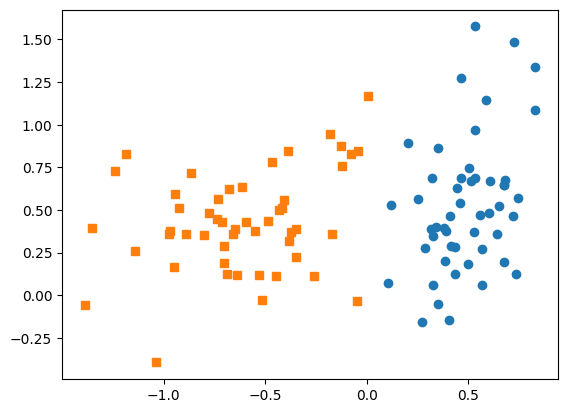

In [3]:
plt.plot(X[y==0,0], X[y==0,1], 'o')
plt.plot(X[y==1,0], X[y==1,1], 's')

We construct $\mathbf{X}$ in the code block below, remembering to include the $x_0 = 1$ column for the bias (intercept).

In [4]:
X = np.hstack((np.ones((X.shape[0],1)), X))
print(X)

[[ 1.         -0.54948638  0.3786438 ]
 [ 1.          0.3780991   0.39551051]
 [ 1.          0.45928819  0.53967316]
 [ 1.         -0.68013412  0.62062155]
 [ 1.         -0.40731836  0.56040861]
 [ 1.         -0.12754626  0.87661405]
 [ 1.          0.32178321  0.68947778]
 [ 1.         -0.70376927  0.28801845]
 [ 1.          0.27151441 -0.154284  ]
 [ 1.          0.006143    1.16752297]
 [ 1.          0.67456965  0.19211449]
 [ 1.          0.32798737  0.34806927]
 [ 1.          0.39189141  0.37699465]
 [ 1.          0.40394545 -0.14586639]
 [ 1.          0.44459507  0.62641981]
 [ 1.          0.4317172   0.28344054]
 [ 1.         -0.46853969  0.77991386]
 [ 1.         -0.59230828  0.42686981]
 [ 1.         -0.18243019  0.9468218 ]
 [ 1.         -0.26045809  0.11363671]
 [ 1.         -0.6146902   0.63545112]
 [ 1.          0.82970299  1.08463774]
 [ 1.         -0.89003042  0.35771953]
 [ 1.          0.51313574  0.66777676]
 [ 1.          0.72382712  1.48519313]
 [ 1.         -0.70257258

### Logistic Regression Model

For Logistic Regression, our hypothesis is 
$$
\hat{y} = h_w(x) = \frac{1}{1+e^{-(w^{T}x)}}
$$
The output rangeo of $\hat{y}$ is between 0 and 1.

#### Sigmoid Function

Let's first implement a Sigmoid function. 

The Sigmoid Function squishes all its inputs (values on the x-axis) between 0 and 1.
$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

In [5]:
np.exp?

Call signature:  np.exp(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'exp'>
File:            ~/Applications/miniconda3/lib/python3.9/site-packages/numpy/__init__.py
Docstring:      
exp(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Calculate the exponential of all elements in the input array.

Parameters
----------
x : array_like
    Input values.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufunc result.
    Elsewhere, the `out` array will retain its origin

In [6]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

As we saw in the lecture, following is the cost fucntion for Logistic Regression for binary classification:
$$
J(data, w) = \frac{1}{n}\sum_{i=1}^{n} L(\hat{y}^{(i)},y^{(i)}) = -\frac{1}{n}\sum_{i=1}^{n} [y^{(i)}log(\hat{y}^{(i)}) + (1-y^{(i)})log(1-\hat{y}^{(i)})]
$$

This loss is also called binary cross entropy error

In [7]:
def loss(y, y_hat):
    loss =  np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return -loss

#### Gradient of the loss function

Now that we know our hypothesis function and the loss function, all we need to do is use the Gradient Descent Algorithm to find the optimal values of our parameters like this ($\eta$ →learning rate), the update rules for parameters are as follows:
$$
w_{t+1} = w_{t} - \eta*dw
$$
Where $dw$ is the partial derivative of loss w.r.t parameter $w$. It looks like:
$$
dw = \frac{1}{n} * (\hat{y}-y).\textbf{X}
$$


In [8]:
def gradients(X, y, y_hat):
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # n-> number of training examples.
    
    n = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw =  (1 / n) * X.T @ (y_hat - y)
    
    return dw


We need to normalize the data before using/computing gradient. It can accelerate the training process.Please make sure we don't normalize the "bias" term (first column).

In [9]:
def normalize(X):
    
    # X --> Input.
    # n-> number of training examples
    # d-> number of features 
    n, d = X.shape
    
    # Normalizing all the d features of X (except the bias (first) column)
    for i in range(d-1):
        X[:,i+1] = (X[:,i+1] - X[:,i+1].mean(axis=0))/X[:,i+1].std(axis=0)
                
    return X

#### Prediction

Now that we have written the functions to learn the parameters, we want to know how our hypothesis($\hat{y}$) is going to make predictions of whether $y=1$ or $y=0$. The way we defined hypothesis is the probability of $y$ being 1 given $\textbf{X}$ and parameterized by $w$.

So, we will say that it will make a prediction of —
$$
\hat{y} = 1 \to w^{T}\textbf{X} \geq 0 \quad \text{OR} \quad \sigma(w^{T} \textbf{X}) \geq 0.5
$$
$$
\hat{y} = 0  \to w^{T}\textbf{X} < 0 \quad \text{OR} \quad  \sigma(w^{T} \textbf{X}) < 0.5
$$


In [10]:
def predict(X,w):
    
    # X --> Input.
    
    # Normalizing the inputs.
    X = normalize(X)
    
    # Calculating prediction/y_hat.
    preds = sigmoid(np.dot(X, w))
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 0
    
    pred_class =  [1 if pred > 0.5 else 0 for pred in preds]
    
    return np.array(pred_class)

So our decision boundary will be:
$$
\hat{y} = 0.5 \quad or \quad w^{T}\textbf{X} = 0
$$

In [11]:
def plot_decision_boundary(X,w):
    ydisp = -(w[0] + w[1] * X)/w[2]
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 1][y==0], X[:, 2][y==0], "g^")
    plt.plot(X[:, 1][y==1], X[:, 2][y==1], "bs")
    
    plt.xlim([-2, 2.2])
    plt.ylim([-2, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(X, ydisp)

Now that we have written all the required blocks for logistic regression model, let's put them together to train our nodel on the training data

In [12]:
def train(X, y, epochs, eta):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # eta --> Learning rate.
        
    # n-> number of training examples
    # d-> number of features 
    
    n, d = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((d,1))

    
    # Reshaping y.
    y = y.reshape(n,1)
    
    # Normalizing the inputs.
    X = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(X, w))
            
            # Getting the gradients of loss w.r.t parameters.
            dw = gradients(X, y, y_hat)
            
            # Updating the parameters.
            w -= eta * dw
        
              # Calculating loss and appending it in the list.
            l = loss(y, sigmoid(np.dot(X, w)))
            losses.append(l)
        
    # returning weights, losses(List).
    return w, losses


In [13]:
# Training 
w, l = train(X, y, epochs=100, eta= 0.01)
w

array([[ 1.01817222e-04],
       [-3.96005872e-01],
       [-4.88163260e-02]])

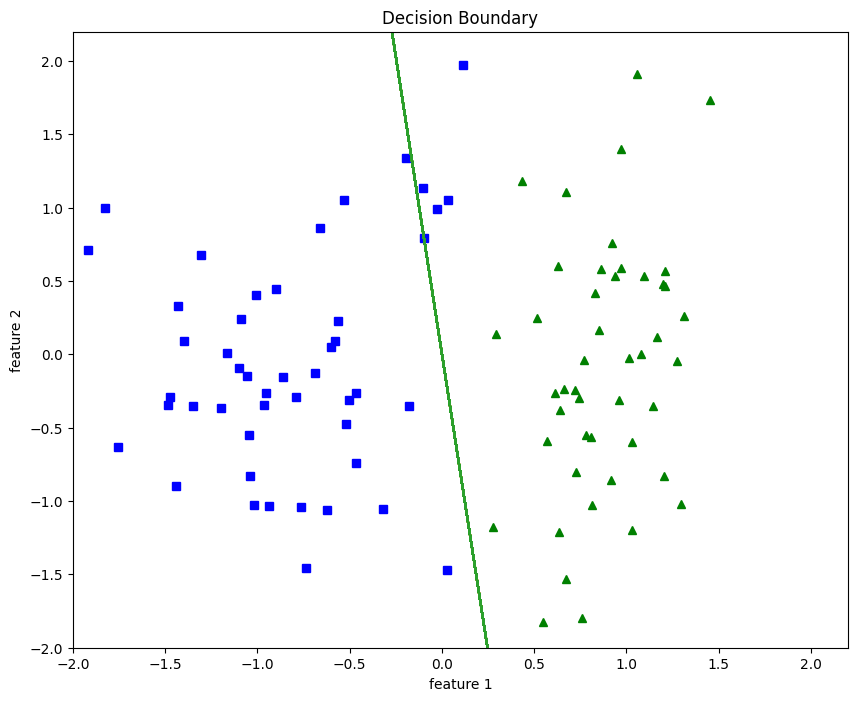

In [14]:
# Plotting Decision Boundary
plot_decision_boundary(X, w)

What do you think about decision bounday or this model? Let's compute the accuracy.

In [15]:
#accuracy
print('The accuracy of model is',(np.sum(1*(y==predict(X,w)))/len(y))*100,'%')

The accuracy of model is 96.0 %


Are you satistifed with the accuracy on this data? How can we check if there is a scope for improvement or if we did something wrong?

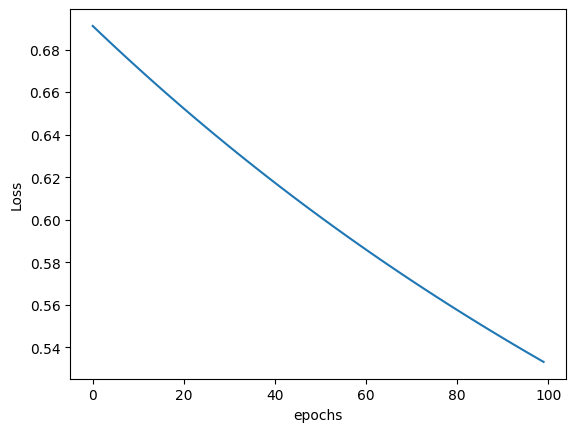

In [16]:
plt.plot(l)
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.show()

Can we learn a better model on this data? and How?

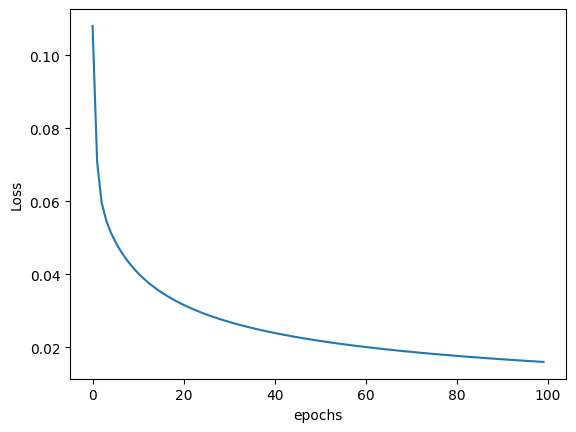

In [17]:
w, l = train(X, y, epochs=100, eta=10)

plt.plot(l)
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.show()

The accuracy of model is 100.0 %


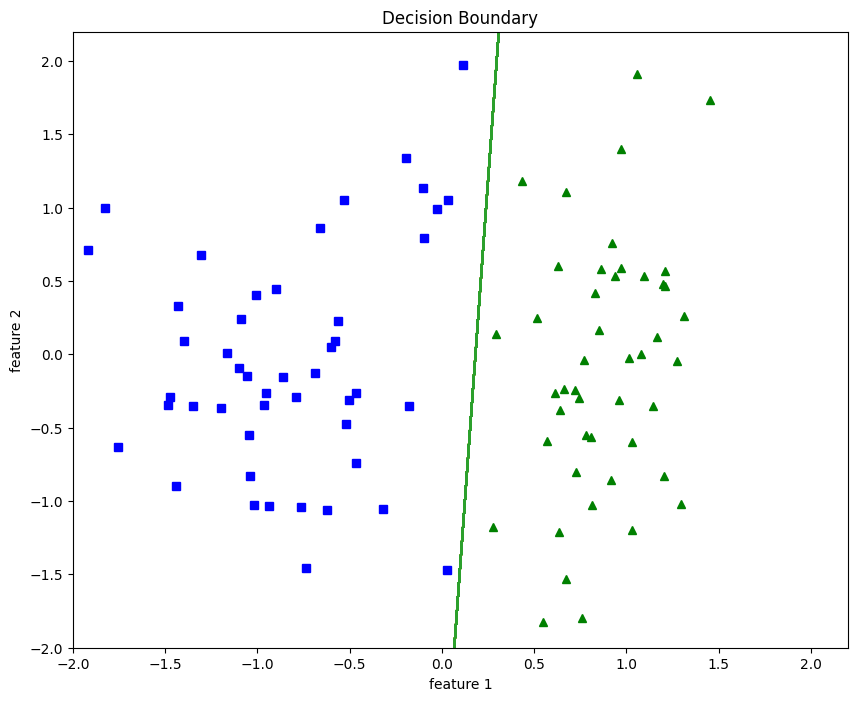

In [18]:
plot_decision_boundary(X, w)
print('The accuracy of model is',(np.sum(1*(y==predict(X,w)))/len(y))*100,'%')

#### Non-linearly separable data

Now, we will see the performance of logistic regression for non-linearly separable data.

In [19]:
#Classification on non-linearly seperable data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.3, random_state=42)

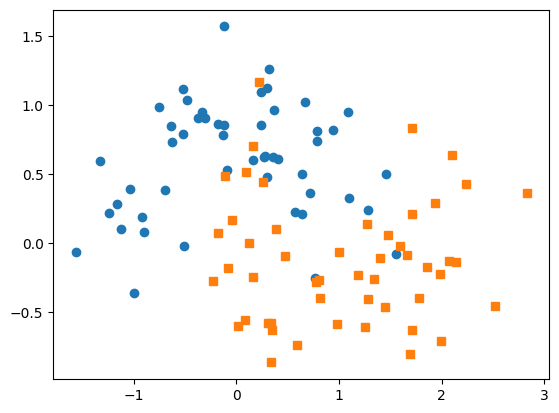

In [20]:
plt.plot(X[y==0,0], X[y==0,1], 'o')
plt.plot(X[y==1,0], X[y==1,1], 's')

In [21]:
X = np.hstack((np.ones((X.shape[0],1)), X))
print(X)

[[ 1.          1.7092841  -0.62715896]
 [ 1.          0.16125362  0.69993975]
 [ 1.          0.77894852 -0.27955446]
 [ 1.         -1.23619542  0.22005824]
 [ 1.         -0.50837336 -0.02206128]
 [ 1.         -0.516412    1.11606547]
 [ 1.          0.29696542  0.48189557]
 [ 1.          1.44341862 -0.46280411]
 [ 1.          0.94175205  0.81894724]
 [ 1.          0.76608944 -0.25316891]
 [ 1.          0.35962319  0.62474532]
 [ 1.         -0.30021833  0.90444205]
 [ 1.          1.69403544 -0.80290638]
 [ 1.         -0.75300692  0.98232568]
 [ 1.          2.09989963  0.64063289]
 [ 1.          1.45417101  0.50077451]
 [ 1.          1.1839408  -0.22639   ]
 [ 1.          0.97650329 -0.58203155]
 [ 1.          0.27362208  0.6270283 ]
 [ 1.         -0.11599096  0.85150489]
 [ 1.         -0.18126863  0.07695834]
 [ 1.          1.97867093 -0.22495779]
 [ 1.          0.15895334  0.60198185]
 [ 1.         -1.16206035  0.28189077]
 [ 1.          0.26164974  0.4446306 ]
 [ 1.          0.24323692

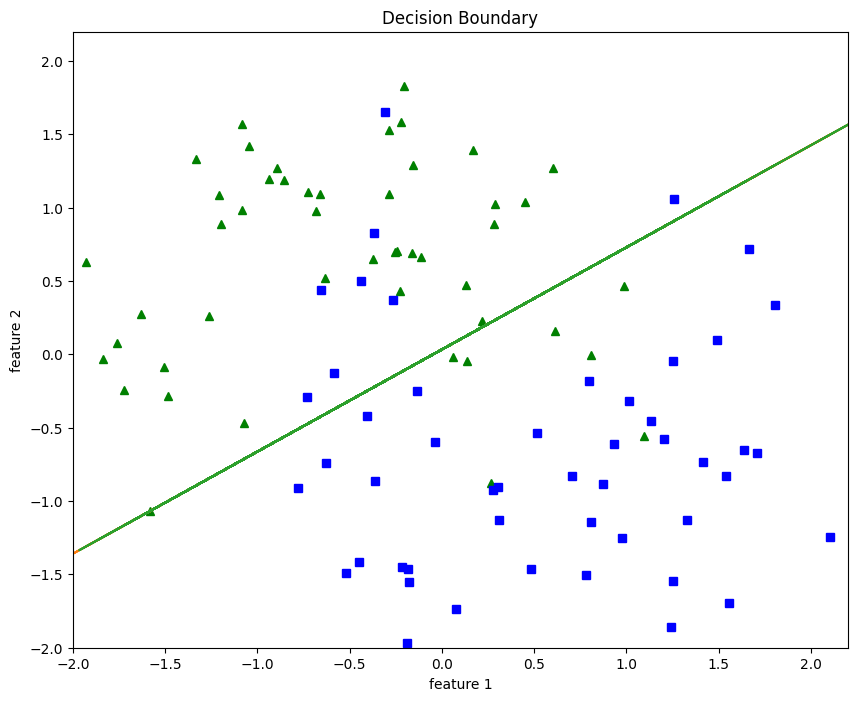

In [22]:
# Training 
w, l = train(X, y, epochs=100, eta=10)
# Plotting Decision Boundary
plot_decision_boundary(X, w)

In [23]:
#accuracy of non-linearly seperable data
print('The accuracy of model is',(np.sum(1*(y==predict(X,w)))/len(y))*100,'%')

The accuracy of model is 85.0 %


### CPS Data: Occupancy Detection based on IoT Sensors

Now we will try out logistic regression on a subset of a CPS Domain data. We will be using the Occupancy Detection Data Set from UCI Machine Learning Repository. This is a binary classification problem which requires that an observation of environmental factors such as temperature and humidity be used to classify whether a room is occupied or unoccupied. 

Data is provided with date-time information and six environmental measures taken each minute over multiple days, specifically:

- Data (Timestamp)
- Temperature in Celsius.
- Relative humidity as a percentage.
- Light measured in lux.
- Carbon dioxide measured in parts per million.
- Humidity ratio, derived from temperature and relative humidity measured in kilograms of water vapor per kilogram of air.
- Occupancy as either 1 for occupied or 0 for not occupied.

We won't be using time-stamp as a feature in this problem.

In [24]:
#read csv file as a pandas dataframe
data= pd.read_csv('occupancy_detection.txt')
data

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


What do you think the best features can be for this classificattion? Let's try predicting using temperature and humidity only. 

In [25]:
# split data into inputs (features) and output (label)
X= data.values[:, 3:5] 
y= data.values[:, -1].astype('int')

Text(0, 0.5, 'humidity')

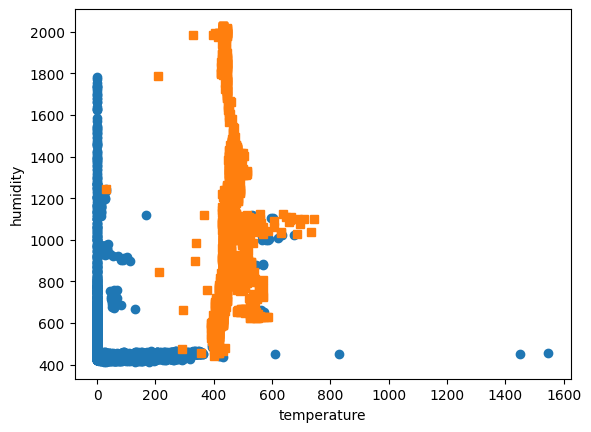

In [26]:
plt.plot(X[y==0,0], X[y==0,1], 'o')
plt.plot(X[y==1,0], X[y==1,1], 's')
plt.xlabel("temperature")
plt.ylabel("humidity")

In [27]:
# split the dataset into training and test
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=1)

In [28]:
from sklearn.linear_model import LogisticRegression

# define the model
model = LogisticRegression()

# fit the model on the training set
model.fit(trainX, trainy)

# predict the test set
yhat = model.predict(testX)

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, accuracy_score,auc, roc_auc_score

print('Precision score %s' % precision_score(testy, yhat))
print('Recall score %s' % recall_score(testy, yhat))
print('F1-score score %s' % f1_score(testy, yhat))
print('Accuracy score %s' % accuracy_score(testy, yhat))

Precision score 0.9617486338797814
Recall score 0.9915492957746479
F1-score score 0.9764216366158114
Accuracy score 0.9895641497851443


Now try with light and $CO_2$ features.

### References
1. Pattern Recognition and Machine Learning, Christopher Bishop, New York, Springer,  2006. (Chapter 3)
2. Machine learning: A Probabilistic Perspective, Kevin Murphy, MIT Press, 2012. (Chapters 17, 18)
3. Statistical Machine Learning Course Workshop, 2015, University of Melbourne, Australia